Extracting EDF parameters from C:\Users\BASAVA\Desktop\DASPS_Database\DASPS_Database\Raw data .edf\S01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42111  =      0.000 ...   328.992 secs...
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 s)

Filtering a subset of channels. The highpass and lowpass values in the measurement

ValueError: x and y must have same first dimension, but have shapes (30464,) and (107520,)

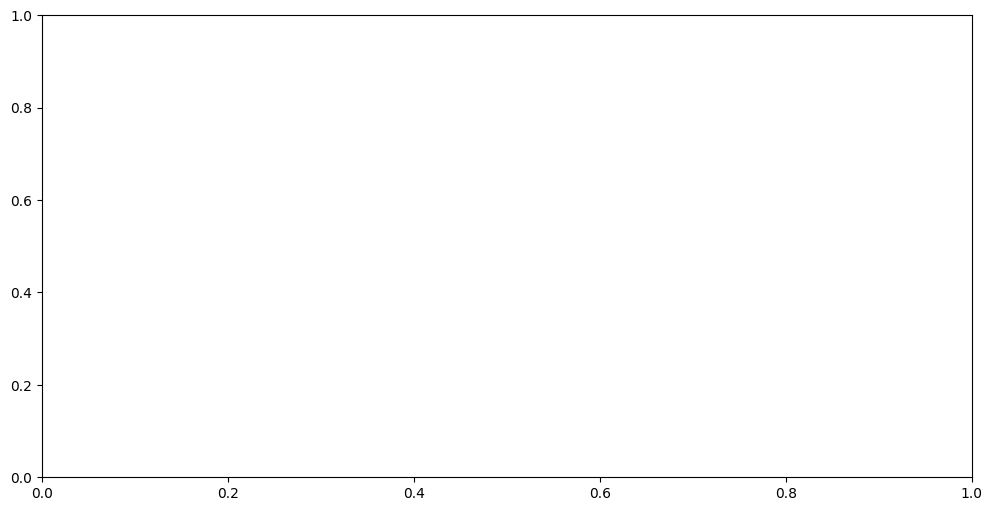

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

def plot_eeg_bands_from_edf(edf_files):
    # Define EEG channels of interest
    eeg_channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

    # Initialize arrays to store filtered data for each frequency band
    alpha_data = []
    beta_data = []
    gamma_data = []

    # Loop through each EDF file
    for edf_file in edf_files:
        # Load EDF file
        raw = mne.io.read_raw_edf(edf_file, preload=True)

        # Filter the data to extract specific frequency bands
        alpha_filtered = raw.copy().filter(8, 12, picks=eeg_channels, fir_design='firwin')
        beta_filtered = raw.copy().filter(13, 30, picks=eeg_channels, fir_design='firwin')
        gamma_filtered = raw.copy().filter(30, 63, picks=eeg_channels, fir_design='firwin')

        # Append filtered data to arrays
        alpha_data.append(alpha_filtered.get_data())
        beta_data.append(beta_filtered.get_data())
        gamma_data.append(gamma_filtered.get_data())

    # Concatenate data from all files along the time axis
    alpha_data = np.concatenate(alpha_data, axis=-1)
    beta_data = np.concatenate(beta_data, axis=-1)
    gamma_data = np.concatenate(gamma_data, axis=-1)

    # Calculate average across channels
    alpha_avg = np.mean(alpha_data, axis=0)
    beta_avg = np.mean(beta_data, axis=0)
    gamma_avg = np.mean(gamma_data, axis=0)

    # Plot EEG data in specific frequency bands on a single graph
    plt.figure(figsize=(12, 6))
    plt.plot(raw.times, alpha_avg.T, label='Alpha Band (8-12 Hz)')
    plt.plot(raw.times, beta_avg.T, label='Beta Band (13-30 Hz)')
    plt.plot(raw.times, gamma_avg.T, label='Gamma Band (30-63 Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('EEG Power Spectral Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of EDF files
edf_files = ["C:/Users/BASAVA/Desktop/DASPS_Database/DASPS_Database/Raw data .edf/S01.edf", "C:/Users/BASAVA/Desktop/DASPS_Database/DASPS_Database/Raw data .edf/S02.edf", "C:/Users/BASAVA/Desktop/DASPS_Database/DASPS_Database/Raw data .edf/S03.edf"]  # Update with your file paths

# Call the function to plot EEG data from multiple EDF files
plot_eeg_bands_from_edf(edf_files)
